# Advanced Machine Learning - laboratory 9 - Density estimation

Patrycja Wysocka, 306022

### Task 1

In [20]:
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

- samples generation

In [2]:
def generate_dataset(n: int = 200) -> np.array:
    sample_1 = np.random.normal(5, 1, int(n*0.9))
    sample_2 = np.random.normal(10, 1, int(n*0.1))

    return np.concatenate((sample_1, sample_2))

dataset = generate_dataset(200)

- approximate f using **Kernel density estimator**

In [3]:
def f(x: float) -> float:
    """
    function calculating density using
    Gaussian Mixture Model (GMM)
    """
    return 0.9*norm.pdf(x, 5, 1) + 0.1*norm.pdf(x, 10, 1)

-  Draw density function corresponding to theoretical distribution and estimated function ˆfn

In [4]:
def calculate_density(dataset, kernel='gaussian', bandwidth=1):
    # fit KDE to the dataset
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(dataset.reshape(-1, 1))

    # x-value range for plotting KDE
    x_range = np.linspace(2, 12, 200)

    # compute the log-likelihood of each sample
    log_density = kde.score_samples(x_range[:, np.newaxis])

    y_estimated = np.exp(log_density)
    y_theoretical = [f(x) for x in x_range]
    
    return x_range, y_estimated, y_theoretical

x_range, y_estimated, y_theoretical = calculate_density(dataset)

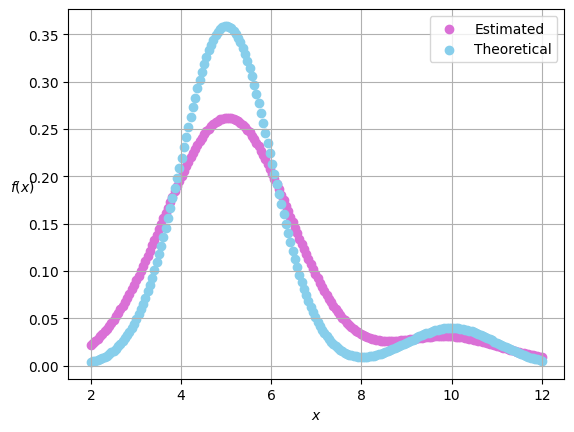

In [5]:
plt.scatter(x_range, y_estimated, color='orchid', label='Estimated')
plt.scatter(x_range, y_theoretical, color='skyblue', label='Theoretical')
    
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation='horizontal')
plt.grid()
plt.legend()
plt.show()

- computer mean square error

In [6]:
mse = mean_squared_error(y_estimated, y_theoretical)
print(f'Mean square error: {mse}')

Mean square error: 0.0014514695103263573


- analyse how the error depends on size `n`

In [7]:
mse_errors =[]

sample_sizes = [50, 90, 100, 200, 300, 500, 600, 750, 1000, 1200, 1500]

for n in sample_sizes:
    dataset = generate_dataset(n)
    
    x_range, y_estimated, y_theoretical = calculate_density(dataset)
    
    mse_errors.append(mean_squared_error(y_estimated, y_theoretical))

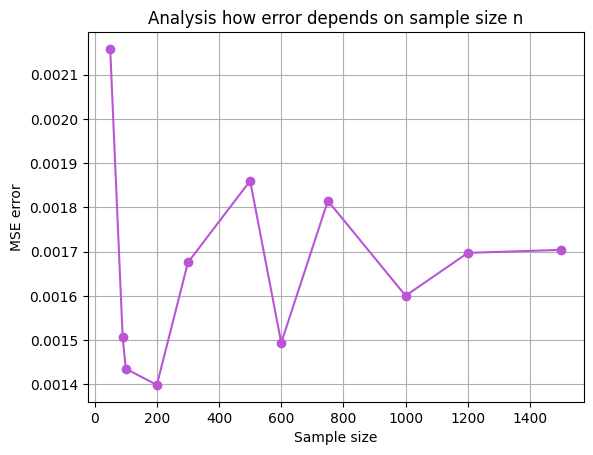

In [8]:
plt.plot(sample_sizes, mse_errors, '-o', color='mediumorchid')
plt.title('Analysis how error depends on sample size n')
plt.xlabel("Sample size")
plt.ylabel("MSE error")
plt.grid()
plt.show()

- analyse the influence of different kernel functions and smoothing parameters

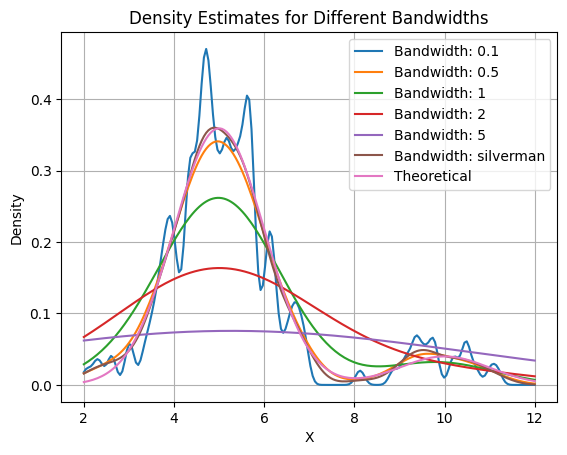

In [9]:
kernels = ['gaussian' , 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
smoothing_parameters = [0.1, 0.5, 1, 2, 5, 'silverman']
densities = []

# kernel exploration 
dataset = generate_dataset(200)

fig, ax = plt.subplots()

# Iterate over each bandwidth
for bandwidth in smoothing_parameters:
    x_range, y_estimated, y_theoretical = calculate_density(dataset, 'gaussian', bandwidth)
    
    # Plot the density estimate for the current bandwidth
    ax.plot(x_range, y_estimated, label=f'Bandwidth: {bandwidth}')

ax.plot(x_range, y_theoretical, label='Theoretical')

ax.legend()
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('Density Estimates for Different Bandwidths')

plt.show()

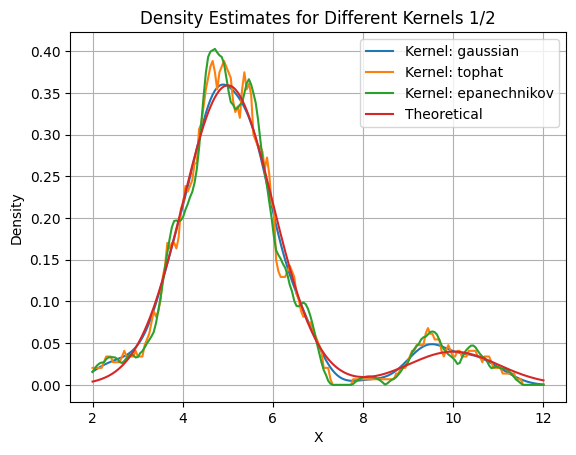

In [10]:
fig, ax = plt.subplots()

# Iterate over each bandwidth
for kernel in kernels[:3]:
    x_range, y_estimated, y_theoretical = calculate_density(dataset, kernel, bandwidth='silverman')
    
    # Plot the density estimate for the current bandwidth
    ax.plot(x_range, y_estimated, label=f'Kernel: {kernel}')

ax.plot(x_range, y_theoretical, label='Theoretical')

ax.legend()
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('Density Estimates for Different Kernels 1/2')

plt.show()

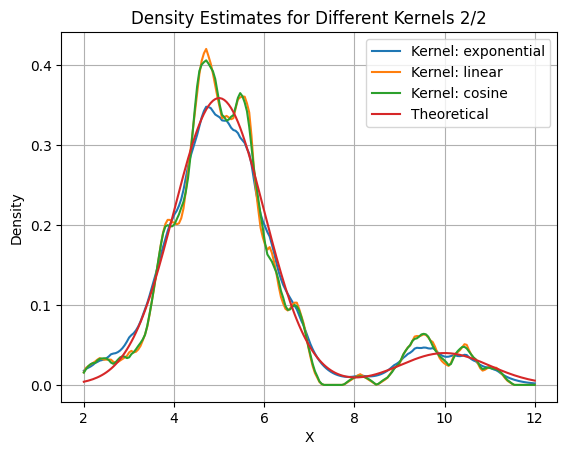

In [11]:
fig, ax = plt.subplots()

# Iterate over each bandwidth
for kernel in kernels[3:]:
    x_range, y_estimated, y_theoretical = calculate_density(dataset, kernel, bandwidth='silverman')
    
    # Plot the density estimate for the current bandwidth
    ax.plot(x_range, y_estimated, label=f'Kernel: {kernel}')

ax.plot(x_range, y_theoretical, label='Theoretical')

ax.legend()
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('Density Estimates for Different Kernels 2/2')

plt.show()

### Task 2

- Kernel density estimator

In [12]:
# method 1
dataset = generate_dataset(200)
x_range_1, y_estimated_1, y_theoretical_1 = calculate_density(dataset)

def create_artificial_dataset(core_dataset, k, n, bandwidth):
    artificial_dataset = []
    
    for _ in range(k):
        i = np.random.randint(0, n)
        epsilon = np.random.normal(0, 1)
        
        x = core_dataset[i]
        new_x = x + epsilon * bandwidth
        artificial_dataset.append(new_x)
        
    return np.array(artificial_dataset)

artificial_dataset = create_artificial_dataset(dataset, 400, 200, 0.5)
    
x_range_2, y_estimated_2, y_theoretical_2 = calculate_density(artificial_dataset)


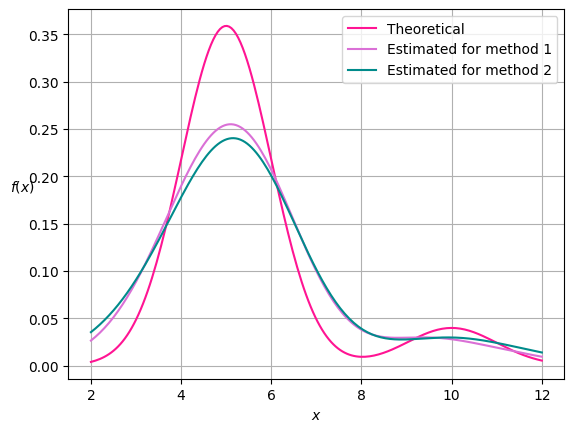

In [13]:
plt.plot(x_range_1, y_theoretical_1, color='deeppink', label='Theoretical')

plt.plot(x_range_1, y_estimated_1, color='orchid', label='Estimated for method 1')
plt.plot(x_range_2, y_estimated_2, color='darkcyan', label='Estimated for method 2')

plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation='horizontal')
plt.grid()
plt.legend()
plt.show()

- MSE

In [14]:
mse_1 = mean_squared_error(y_theoretical, y_estimated_1)
mse_2 = mean_squared_error(y_theoretical, y_estimated_2)

print(f'MSE for method 1: {mse_1}')
print(f'MSE for method 2: {mse_2}')

MSE for method 1: 0.0017282958298324902
MSE for method 2: 0.0022372094381212957


### Task 3

**dataset**: Prima Indians Diabetes dataset </br>
**source**: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [15]:
diabetes_df = pd.read_csv('../09-density-estimation/data/diabetes.csv')
diabetes_df.rename(columns={"Outcome": 'label'}, inplace=True)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
def convert_data(df):
    y = df['label'].values
    X = df.loc[:, df.columns != 'label'].values
    
    return X, y

In [21]:
X, y = convert_data(diabetes_df)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [22]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

- Naive Bayes method (with kernel density estimator)


In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from models import NaiveBayes, NaiveBayesKDE, LDA

In [54]:
gaussianNB = GaussianNB()
gaussianNB.__name__ = "Naive Bayes Gaussian - sklearn version"
lda = LinearDiscriminantAnalysis()
lda.__name__ = "LDA - sklearn version"
multinomialNB = MultinomialNB()
multinomialNB.__name__ = "Naive Bayes Multinomial - sklearn version"
models = [NaiveBayesKDE(), NaiveBayes(), gaussianNB, lda, LDA(), multinomialNB]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy(y_test, y_pred)
    
    print(f'Model {model.__name__} accuracy: {round(acc*100)}%')

Model Naive Bayes with KDE accuracy: 66%
Model Naive Bayes accuracy: 77%
Model Naive Bayes Gaussian - sklearn version accuracy: 77%
Model LDA - sklearn version accuracy: 81%
Model LDA accuracy: 75%
Model Naive Bayes Multinomial - sklearn version accuracy: 57%


In [72]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_train_trans = kbins.fit_transform(X_train)
X_test_trans = kbins.fit_transform(X_test)

/home/wpartycja/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/wpartycja/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [75]:
model = GaussianNB()

model.fit(X_train_trans, y_train)
y_pred = model.predict(X_test_trans)
acc = accuracy(y_test, y_pred)
print(acc)

0.7727272727272727
